# Regression Model Development (Birthweight Dataset)

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birth = pd.read_excel(io = file,
                       header = 0,
                       sheet_name = 0)


# outputting the first ten rows of the dataset
birth.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778
6,26,13.0,7,11.0,42,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birth.shape[0]}
Features:     {birth.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 352
Features:     18



In [3]:
# INFOrmation about each variable
birth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB


In [4]:
# developing a correlation matrix
birth_corr = birth.corr(method = 'pearson')


#sorting the values of correlations from highest to lowest
birth_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
fmaps     0.46
omaps     0.45
npvis     0.30
feduc     0.24
meduc     0.20
moth      0.10
foth      0.05
mblck     0.04
fblck     0.03
monpre    0.02
male      0.02
fwhte    -0.07
mwhte    -0.14
mage     -0.48
cigs     -0.57
fage     -0.58
drink    -0.67
Name: bwght, dtype: float64

In [6]:
# descriptive statistics for numeric data
birth.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,352.00,349.00,352.00,349.00,352.00,345.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,38.93,13.54,2.02,13.53,40.60,13.58,7.95,8.88,10.76,5.53,0.55,0.33,0.36,0.30,0.40,0.33,0.27,3246.09
std,10.36,2.29,0.34,6.32,12.21,2.97,2.02,0.79,6.95,3.87,0.50,0.47,0.48,0.46,0.49,0.47,0.45,757.70
min,21.00,0.00,1.00,2.00,19.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,32.00,12.00,2.00,10.00,31.75,12.00,8.00,9.00,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2867.75
50%,37.00,13.00,2.00,12.00,39.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3349.00
75%,45.00,16.00,2.00,16.00,47.25,16.00,9.00,9.00,16.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3778.75
max,73.00,18.00,7.00,42.00,72.00,19.00,10.00,10.00,32.00,21.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [7]:
#checking for null values
birth.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [8]:
# imputing everything else with the zero

# meduc
fill = 0
birth['meduc'] = birth['meduc'].fillna(value = fill)


# npvis
fill = 0
birth['npvis'] = birth['npvis'].fillna(value = fill)


# feduc
fill = 0
birth['feduc'] = birth['feduc'].fillna(value = fill)

In [9]:
# making sure all missing values have been taken care of
birth.isnull().any(axis = 0).any(axis = 0)

False

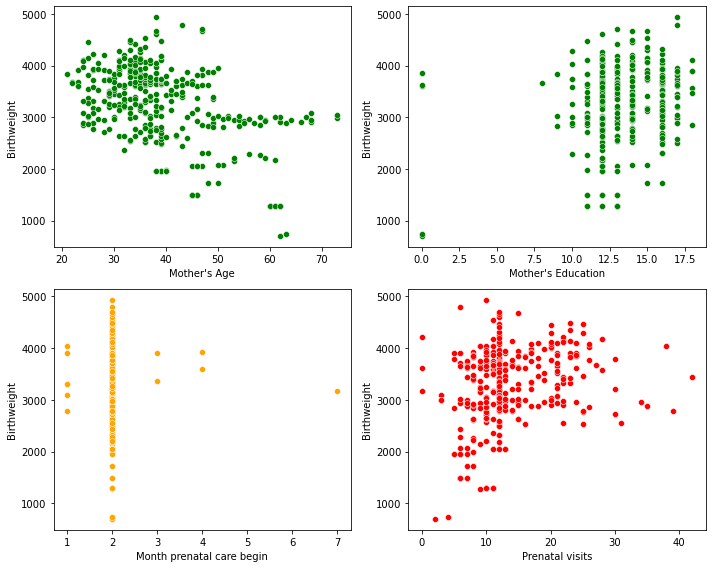

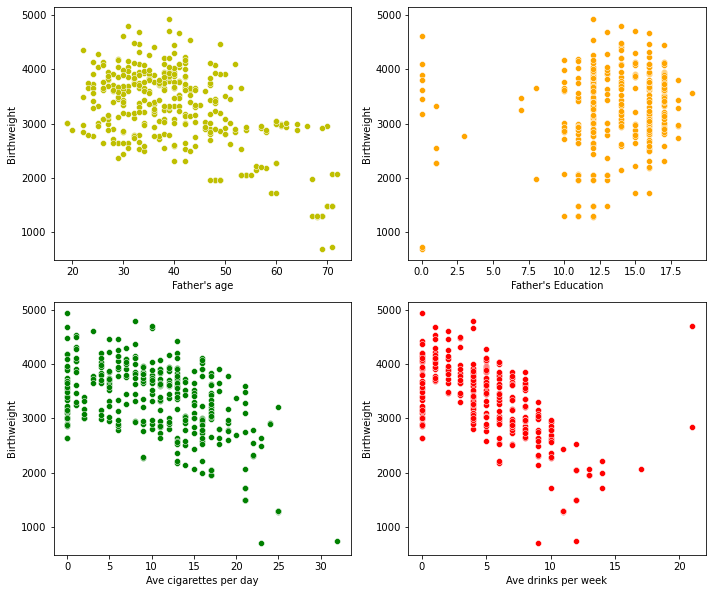

In [10]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birth['mage'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birth['meduc'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birth['monpre'],
                y = birth['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Month prenatal care begin')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birth['npvis'],
                y = birth['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Prenatal visits')
plt.ylabel(ylabel = 'Birthweight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Birth Scatterplots 1 of 2.png')
plt.show()

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birth['fage'],
                y = birth['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = "Father's age")
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birth['feduc'],
                y = birth['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birth['cigs'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Ave cigarettes per day')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = birth['drink'],
                y = birth['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Ave drinks per week')
plt.ylabel(ylabel = 'Birthweight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Birth Scatterplots 2 of 2.png')
plt.show()

array([[<AxesSubplot:title={'center':'mage'}>,
        <AxesSubplot:title={'center':'meduc'}>,
        <AxesSubplot:title={'center':'monpre'}>,
        <AxesSubplot:title={'center':'npvis'}>],
       [<AxesSubplot:title={'center':'fage'}>,
        <AxesSubplot:title={'center':'feduc'}>,
        <AxesSubplot:title={'center':'omaps'}>,
        <AxesSubplot:title={'center':'fmaps'}>],
       [<AxesSubplot:title={'center':'cigs'}>,
        <AxesSubplot:title={'center':'drink'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'mwhte'}>],
       [<AxesSubplot:title={'center':'mblck'}>,
        <AxesSubplot:title={'center':'moth'}>,
        <AxesSubplot:title={'center':'fwhte'}>,
        <AxesSubplot:title={'center':'fblck'}>],
       [<AxesSubplot:title={'center':'foth'}>,
        <AxesSubplot:title={'center':'bwght'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

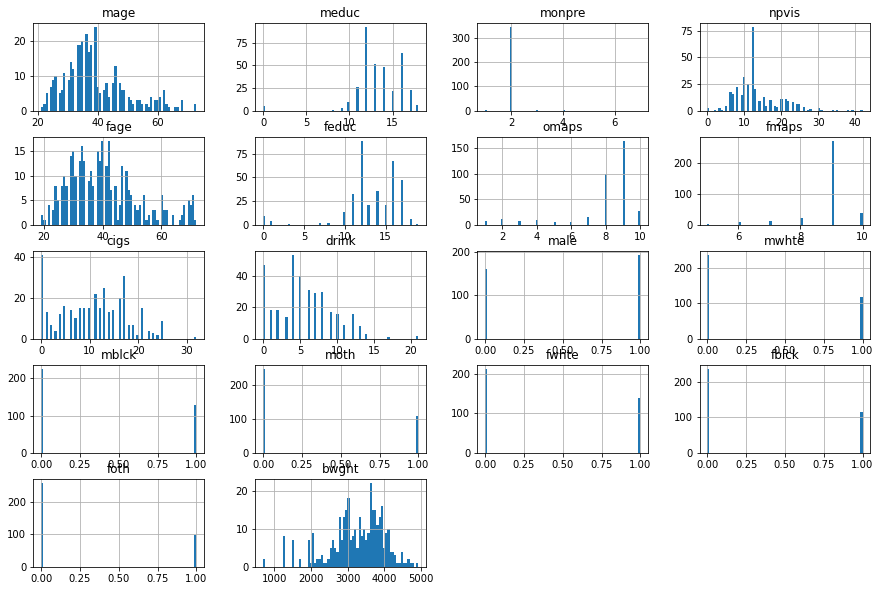

In [11]:
#plotting histogram of all variables to see if a variable is skewed
birth.hist(figsize = (15,10), bins = 70)

In [12]:
# counting the number of zeroes for continuous variables
meduc_zeroes  = len(birth['meduc'][birth['meduc'] == 0]) # meduc
monpre_zeroes = len(birth['monpre'][birth['monpre'] == 0]) # monpre
npvis_zeroes   = len(birth['npvis'][birth['npvis'] == 0]) # npvis
feduc_zeroes  = len(birth['feduc'][birth['feduc'] == 0]) # feduc
cigs_zeroes  = len(birth['cigs'][birth['cigs'] == 0]) # cigs
drink_zeroes  = len(birth['drink'][birth['drink'] == 0]) # drinks


# printing a table of the results
print(f"""
                           No\t\tYes
                        ---------------------
mother's educ             | {meduc_zeroes}\t\t{len(birth) - meduc_zeroes}
month prenatal care began | {monpre_zeroes}\t\t{len(birth) - monpre_zeroes}
prenatal visit            | {npvis_zeroes}\t\t{len(birth) - npvis_zeroes}
father's education        | {feduc_zeroes}\t\t{len(birth) - feduc_zeroes}
ave cigarettes per day    | {cigs_zeroes}\t\t{len(birth) - cigs_zeroes}
ave drinks per day        | {drink_zeroes}\t\t{len(birth) - drink_zeroes}
""")


                           No		Yes
                        ---------------------
mother's educ             | 5		347
month prenatal care began | 0		352
prenatal visit            | 3		349
father's education        | 9		343
ave cigarettes per day    | 41		311
ave drinks per day        | 47		305



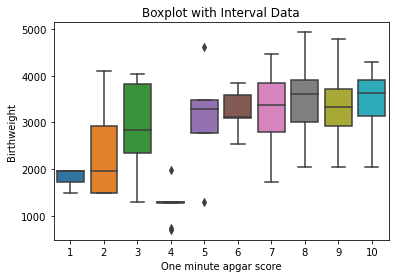

In [39]:
# developing a boxplot for interval variables(omaps)
sns.boxplot(x    = 'omaps',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'One minute apgar score')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

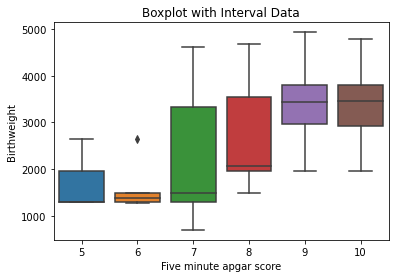

In [40]:
# developing a boxplot for interval variables(fmaps)
sns.boxplot(x    = 'fmaps',
            y    = 'bwght',
            data = birth)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Five minute apgar score')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

In [41]:
# printing columns
print(f"""
Male
------
{birth['male'].value_counts()}


Mwhite
----------
{birth['mwhte'].value_counts()}


Mblack
-------------
{birth['mblck'].value_counts()}

Moth
-------------
{birth['moth'].value_counts()}

fwhite
-------------
{birth['fwhte'].value_counts()}


fblack
-------------
{birth['fblck'].value_counts()}

foth
-------------
{birth['foth'].value_counts()}
""")


Male
------
1    192
0    160
Name: male, dtype: int64


Mwhite
----------
0    235
1    117
Name: mwhte, dtype: int64


Mblack
-------------
0    224
1    128
Name: mblck, dtype: int64

Moth
-------------
0    245
1    107
Name: moth, dtype: int64

fwhite
-------------
0    212
1    140
Name: fwhte, dtype: int64


fblack
-------------
0    236
1    116
Name: fblck, dtype: int64

foth
-------------
0    256
1     96
Name: foth, dtype: int64



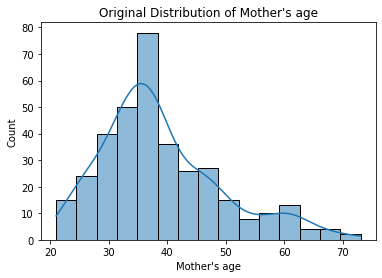

In [13]:
# developing a histogram using HISTPLOT
sns.histplot(data  = birth,
         x     = 'mage',
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mother's age")
plt.xlabel(xlabel = "Mother's age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [14]:
# log transforming mother's age and saving it to the dataset
birth['log_mage'] = np.log(birth['mage'])

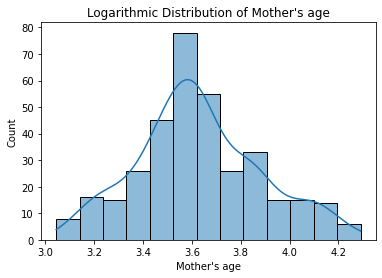

In [15]:
# developing a histogram for the tranformed mother's age
sns.histplot(data   = birth,
          x      = 'log_mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's age")
plt.xlabel(xlabel = "Mother's age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

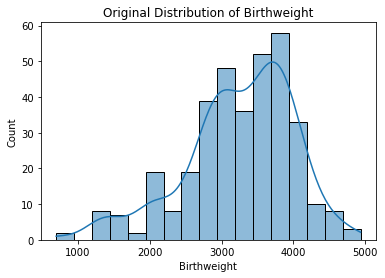

In [16]:
# developing a histogram using HISTPLOT
sns.histplot(data  = birth,
         x     = 'bwght',
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [17]:
# log transforming birthweight and saving it to the dataset
birth['log_bwght'] = np.log(birth['bwght'])

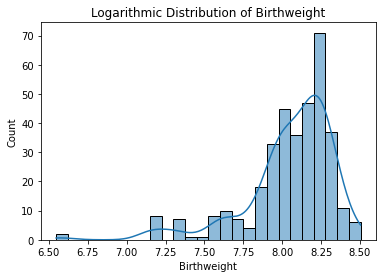

In [18]:
# developing a histogram for the tranformed mother's age
sns.histplot(data   = birth,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [19]:
#creating a new feature by combining mage and fage 
birth['mage*fage'] = birth["mage"] * birth["fage"]

#creating a new feature by combining cigs and drink
birth['cigs*drink'] = birth["cigs"] * birth["drink"]

birth.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_mage,log_bwght,mage*fage,cigs*drink
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600,3.135494,8.188689,1058,52
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912,3.135494,8.271804,1150,1
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090,3.178054,8.035926,624,84
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370,3.218876,8.122668,825,84
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827,3.218876,8.249836,800,12
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778,3.258097,7.929487,624,48
6,26,13.0,7,11.0,42,0.0,9,9,2,4,1,0,1,0,1,0,0,3170,3.258097,8.061487,1092,8
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310,3.258097,8.104703,1144,40
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730,3.258097,8.224164,624,44
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912,3.258097,8.271804,832,0


In [21]:
# printing correlations with the new variables
birth_corr = birth.loc[ : , ['log_bwght', 'log_mage', 'mage*fage','meduc', 'monpre',
                               'npvis', 'feduc','omaps', 'fmaps', 'male', 
                               'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 
                               'foth','cigs*drink','cigs', 'drink']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

print(f"""
Correlations
---------------------
{birth_corr['log_bwght']}

""")


Correlations
---------------------
log_bwght     1.00
log_mage     -0.47
mage*fage    -0.64
meduc         0.27
monpre        0.02
npvis         0.29
feduc         0.24
omaps         0.51
fmaps         0.54
male         -0.02
mwhte        -0.14
mblck         0.02
moth          0.12
fwhte        -0.07
fblck        -0.00
foth          0.08
cigs*drink   -0.82
cigs         -0.58
drink        -0.65
Name: log_bwght, dtype: float64




In [27]:
# declaring set of x-variables
x_variables = [ 'log_mage', 'mage*fage','meduc', 'monpre',
               'npvis', 'feduc','omaps', 'fmaps', 'male', 
               'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 
               'foth','cigs*drink','cigs', 'drink']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_mage +
mage*fage +
meduc +
monpre +
npvis +
feduc +
omaps +
fmaps +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
cigs*drink +
cigs +
drink +


In [29]:
# preparing explanatory variable data
birth_data   = birth.drop(['bwght',
                            'log_bwght'],
                                axis = 1)

# preparing response variable data
birth_target = birth.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (264, 20)
y-side: 264


Testing Data
------------
X-side: (88, 20)
y-side: 88



In [30]:
# merging X_train and y_train so that they can be used in statsmodels
birth_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_bwght ~ log_mage +
                                        mage*fage +
                                        meduc +
                                        monpre +
                                        npvis +
                                        feduc +
                                        omaps +
                                        fmaps +
                                        male +
                                        mwhte +
                                        mblck +
                                        moth +
                                        fwhte +
                                        fblck +
                                        foth +
                                        cigs*drink +
                                        cigs +
                                        drink                           
                                            """,
                                data = birth_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     55.05
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           2.33e-75
Time:                        20:51:57   Log-Likelihood:                 171.12
No. Observations:                 264   AIC:                            -304.2
Df Residuals:                     245   BIC:                            -236.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7263      0.417     11.333      0.0

In [31]:
# preparing explanatory variable data
birth_data   = birth.loc[ : , x_variables]


# preparing response variable data
birth_target = birth.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target,
            test_size = 0.25,
            random_state = 219)

In [32]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(2))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test, y_test).round(2)) # using R-square

lr_train_score = lr.score(x_train, y_train).round(2)
lr_test_score = lr.score(x_test, y_test).round(2)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(2))
lr_test_gap = abs(lr_train_score - lr_test_score).round(2)

#if gap is more than 0.05, reduce the x- varialbles

OLS Training Score : 0.77
OLS Testing Score  : 0.82
OLS Train-Test Gap : 0.05


In [33]:
# zipping each feature name to its coefficient
lr_model_values = zip(birth_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 7.18)
('log_mage', 0.22)
('mage*fage', -0.0)
('meduc', 0.01)
('monpre', 0.04)
('npvis', 0.0)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 0.02)
('male', 0.04)
('mwhte', -0.02)
('mblck', -0.02)
('moth', 0.03)
('fwhte', -0.01)
('fblck', 0.03)
('foth', -0.02)
('cigs*drink', -0.0)
('cigs', 0.01)
('drink', 0.02)


In [34]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(2))
print('Testing Score :',  ard_model.score(x_test, y_test).round(2))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(2)
ard_test_score  = ard_model.score(x_test, y_test).round(2)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(2))
ard_test_gap = abs(ard_train_score - ard_test_score).round(2)

Training Score: 0.55
Testing Score : 0.6
ARD Train-Test Gap : 0.05


In [35]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 12)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(2))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(2))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(2)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(2)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(2))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(2)

KNN Training Score: 0.73
KNN Testing Score : 0.51
KNN Train-Test Gap: 0.22


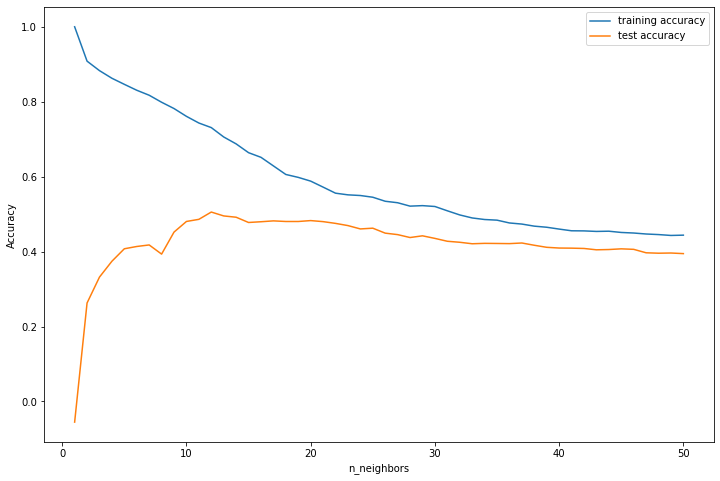

In [36]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [37]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 12


In [38]:
# comparing results

print(f"""
Model      Train Score      Test Score        Test Gap
-----      -----------      ----------       ----------
OLS***        {lr_train_score}             {lr_test_score}             {lr_test_gap }
ARD           {ard_train_score}             {ard_test_score}              {ard_test_gap}
KNN           {knn_reg_score_train}             {knn_reg_score_test}             {knn_reg_test_gap}

***FINAL MODEL
""")


Model      Train Score      Test Score        Test Gap
-----      -----------      ----------       ----------
OLS***        0.77             0.82             0.05
ARD           0.55             0.6              0.05
KNN           0.73             0.51             0.22

***FINAL MODEL

